In [33]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
min_long = housing['longitude'].min()
max_long = housing['longitude'].max()
min_lat = housing['latitude'].min()
max_lat = housing['latitude'].max()

In [11]:
(min_long, max_long, min_lat, max_lat)

(-124.35, -114.31, 32.54, 41.95)

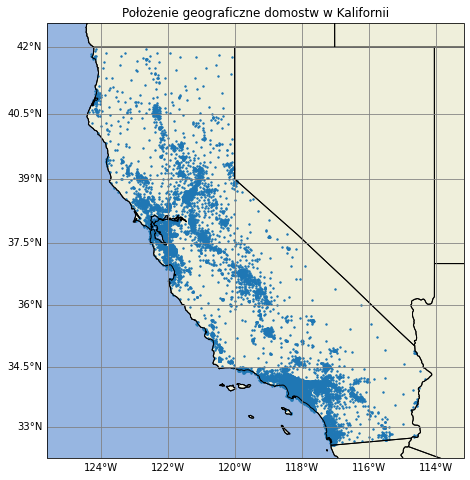

In [66]:


fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.Mercator(central_longitude = (min_long + max_long)/2,
                                        min_latitude = min_lat * 0.9,
                                        max_latitude = max_lat * 1.1))
ax.set_extent([min_long * 1.01, 
               max_long * 0.99, 
               min_lat * 0.99, 
               max_lat * 1.01])
gl = ax.gridlines(draw_labels=True,
                 color='gray')
gl.top_labels = False
gl.right_labels = False
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.set_title('Położenie geograficzne domostw w Kalifornii')
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

ax.scatter(housing['longitude'], housing['latitude'],
          transform = ccrs.PlateCarree(),
          s=2)
plt.show()

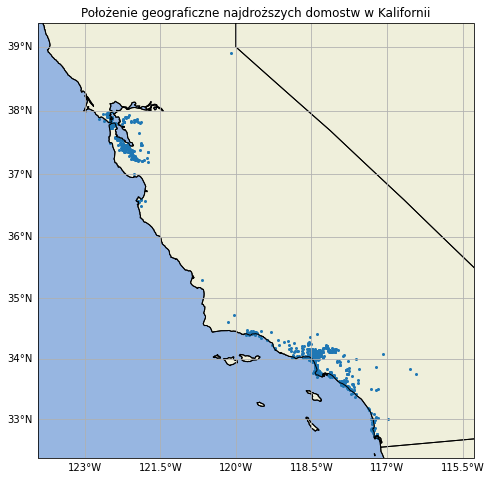

In [60]:
expensive_housing = housing.loc[housing['median_house_value'] >= 4.9e5]

min_long = expensive_housing['longitude'].min()
max_long = expensive_housing['longitude'].max()
min_lat = expensive_housing['latitude'].min()
max_lat = expensive_housing['latitude'].max()

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.Mercator(central_longitude = (min_long + max_long)/2,
                                        min_latitude = min_lat * 0.9,
                                        max_latitude = max_lat * 1.1))
ax.set_extent([min_long * 1.01, 
               max_long * 0.99, 
               min_lat * 0.99, 
               max_lat * 1.01])
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.set_title('Położenie geograficzne najdroższych domostw w Kalifornii')
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

ax.scatter(expensive_housing['longitude'], expensive_housing['latitude'],
          transform = ccrs.PlateCarree(),
          s=4)
plt.show()